In [5]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import os

print(os.getcwd())

#configuration
font_size=36
width=500
height=100
back_ground_color=(255,255,255)
font_size=36
font_color=(150,0,0)
unicode_text =u"😀"
im  =  Image.new ( "RGB", (width,height), back_ground_color )
draw  =  ImageDraw.Draw ( im )
unicode_font = ImageFont.truetype("fonts/Symbola.ttf", font_size)
draw.text ( (10,10), unicode_text, font=unicode_font, fill=font_color )
im.show()

/home/maxi/Documents/UNI/Thesis/dev/SoS


In [5]:
import tensorflow as tf
from tensorflow.keras import layers
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model
  
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model
  
gen = make_generator_model()
disc = make_discriminator_model()

In [6]:
gen.summary()
disc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1254400   
_________________________________________________________________
batch_normalization_3 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)        

In [3]:
import os

os.listdir("emojis/nature/microsoft")

['snake_1f40d.png',
 'giraffe-face_1f992.png',
 'hear-no-evil-monkey_1f649.png',
 'collision-symbol_1f4a5.png',
 'globe-with-meridians_1f310.png',
 'cactus_1f335.png',
 'pine-decoration_1f38d.png',
 'bird_1f426.png',
 'dolphin_1f42c.png',
 'spider-web_1f578.png',
 'sun-behind-cloud_26c5.png',
 'comet_2604.png',
 'earth-globe-americas_1f30e.png',
 'new-moon-with-face_1f31a.png',
 'earth-globe-asia-australia_1f30f.png',
 'black-sun-with-rays_2600.png',
 'sheep_1f411.png',
 'rhinoceros_1f98f.png',
 'penguin_1f427.png',
 'maple-leaf_1f341.png',
 'swan_1f9a2.png',
 'cloud-with-snow_1f328.png',
 'ox_1f402.png',
 'tiger-face_1f42f.png',
 'chicken_1f414.png',
 'cricket_1f997.png',
 'spider_1f577.png',
 'crocodile_1f40a.png',
 'white-sun-behind-cloud-with-rain_1f326.png',
 'eagle_1f985.png',
 'skunk_1f9a8.png',
 'blossom_1f33c.png',
 'deer_1f98c.png',
 'sunflower_1f33b.png',
 'umbrella_2602.png',
 'sparkles_2728.png',
 'waxing-gibbous-moon-symbol_1f314.png',
 'shooting-star_1f320.png',
 'servic

In [1]:
x = 5

def what(inp):
  inp = inp + 7
  print(f"{inp=}")
  

print(f"{x=}")
what(x)
print(f"{x=}")

x=5
inp=12
x=5


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


TypeError: Image data of dtype object cannot be converted to float

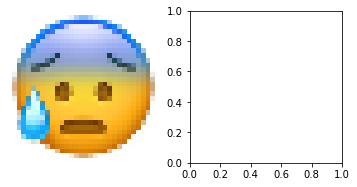

In [12]:
# superpixel testing:
import cv2
import config
import utils
import datasets
import matplotlib.pyplot as plt
# print(cv2.__version__)
em = datasets.Emoji("emojis/people/apple/anxious-face-with-sweat_1f630", from_file=True)
img = em.emoji_img
# cv2
sup = cv2.ximgproc.createSuperpixelLSC(img)
print(sup.getLabels())

plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(sup)
plt.axis('off')
plt.show()

ic| image.shape: (120, 120, 3)
<ipython-input-4-2d2470c0fd3d>:20: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = numSegments, sigma = 5)


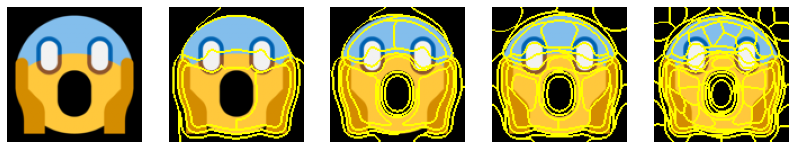

In [4]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from icecream import ic
# construct the argument parser and parse the arguments

plt.rcParams['figure.figsize'] = [14,10]
img_path = "emojis/people/microsoft/face-screaming-in-fear_1f631.png"
# load the image and convert it to a floating point data type
image = img_as_float(io.imread(img_path))
image = image[:,:,:3]
ic(image.shape)
# loop over the number of segments
for idx, numSegments in enumerate((1, 10, 25, 50, 100)):
  # apply SLIC and extract (approximately) the supplied number
  # of segments
  segments = slic(image, n_segments = numSegments, sigma = 5)
  # show the output of SLIC
  plt.subplot(1,5,idx+1)
  # fig = plt.figure("Superpixels -- %d segments" % (numSegments))
  # ax = fig.add_subplot(1, 1, 1)
  # segments = segments[:,:,None]
  # ic(segments.shape)
  # print(segments)
  out = mark_boundaries(image, segments)
  # print(out.shape)
  # ax.imshow(out)
  
  plt.axis("off")
  plt.imshow(out)
# show the plots
plt.show()

In [18]:
from skimage.measure import regionprops
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import config as cfg
from icecream import ic
import cv2
import numpy as np
import datasets

%matplotlib qt

img_path = "emojis/people/microsoft/face-screaming-in-fear_1f631"
# image = img_as_float(io.imread(img_path))[:,:,:3]
em = datasets.Emoji(img_path, from_file=True)
image = em.emoji_img
edges = em.get_gray_edge_image(image)

image_rgb = image[:,:,:3]
# TODO potentially randomize segments and sigmas such that the informations are not always on the same spot
segments = slic(image_rgb, n_segments = 10, sigma = 20, start_label=1)
segmented_img = mark_boundaries(image_rgb, segments)
regions = regionprops(segments)
centrs = np.zeros((40,40,1))


plt.subplot(141)
plt.imshow(edges[:,:,:3])
plt.axis('off')

for props in regions:
    print(props.centroid)
    cx, cy = props.centroid  # centroid coordinates
    cx = int(np.around(cx))
    cy = int(np.around(cy))
    # ic(int(np.around(cx)))
    # ic(segmented_img.shape)
    edges[cx-1:cx+2,cy-1:cy+2,:] = image[cx-1:cx+2,cy-1:cy+2,:]
    # segmented_img[cx, cy, :] = 1
    centrs[cx, cy] = 1


plt.subplot(142)
plt.imshow(centrs, cmap="gray")
plt.axis('off')

plt.subplot(143)
plt.axis('off')
plt.imshow(edges[:,:,:3])

plt.subplot(144)
plt.axis('off')
plt.imshow(image_rgb)

plt.show()

(5.0, 5.0)
(5.0, 15.5)
(5.0, 26.0)
(15.5, 5.0)
(15.5, 15.5)
(15.5, 26.0)
(26.0, 5.0)
(26.0, 15.5)
(26.0, 26.0)


In [11]:
def f(**kwargs):
  # print(kwargs)
  return kwargs
  
# f(5, 17, "steve")
print("steve" in f(steve="fish"))

True


In [10]:
what = "somiteh"
print(f"{what = }")

def som_func(inp):
  return inp + 1

print(f"{som_func = }")

what = 'somiteh'
som_func = <function som_func at 0x7f58bc14bc10>


In [21]:
import os

out = list(set(os.listdir("emojis/people/apple")).intersection(set(os.listdir("emojis/people/whatsapp"))))
out = [it.split(".")[0] for it in out]
out

['woman-teacher_1f469-200d-1f3eb',
 'person-getting-haircut_1f487',
 'man-farmer_1f468-200d-1f33e',
 'family-woman-girl-boy_1f469-200d-1f467-200d-1f466',
 'girl_1f467',
 'student_1f9d1-200d-1f393',
 'man-judge_1f468-200d-2696-fe0f',
 'weary-face_1f629',
 'crying-face_1f622',
 'flexed-biceps_1f4aa',
 'neutral-face_1f610',
 'beaming-face-with-smiling-eyes_1f601',
 'child_1f9d2',
 'man-in-motorized-wheelchair_1f468-200d-1f9bc',
 'anatomical-heart_1fac0',
 'goggles_1f97d',
 'smiling-face-with-sunglasses_1f60e',
 'zany-face_1f92a',
 'woman-raising-hand_1f64b-200d-2640-fe0f',
 'woman-walking_1f6b6-200d-2640-fe0f',
 'man-teacher_1f468-200d-1f3eb',
 'high-heeled-shoe_1f460',
 'slightly-smiling-face_1f642',
 'disguised-face_1f978',
 'family-man-girl-girl_1f468-200d-1f467-200d-1f467',
 'woman-singer_1f469-200d-1f3a4',
 'kissing-face-with-smiling-eyes_1f619',
 'old-man_1f474',
 'face-with-symbols-on-mouth_1f92c',
 'man-blond-hair_1f471-200d-2642-fe0f',
 'running-shoe_1f45f',
 'face-with-monocle_1

In [17]:
x = ["ac", "b", "c"]
z = ["c", "d", "ac", "a"]

out = list(set(x).intersection(set(z)))
out

['ac', 'c']

In [5]:
# loading dataset from folder:

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

def show_img_by_path(path):
  img = Image.open(path)
  img = np.array(img)
  print(img.shape)
  plt.imshow(img)
  plt.show()


categories = os.listdir("emojis")
print("all categories:", categories)
font_list = os.listdir("emojis/" + categories[0])
print("all fonts: ",font_list )
all_cats = []
for category in categories:
  fonts = os.listdir("emojis/" + category)
  # fonts_list = np.empty((len(fonts),), dtype='i4, object')
  fonts_list = []
  for idx, font in enumerate(fonts):
    num_pngs = len(os.listdir("emojis/" + category + "/" + font))
    # fonts_list[idx] = (num_pngs, font)
    # fonts_list.append([num_pngs, idx])
    fonts_list.append(num_pngs)
  # print(fonts_list)
  # fonts_list = np.stack(fonts_list, axis=0)
  # print(fonts_list)
  all_cats.append(fonts_list)
  # print(fonts_list.shape)
all_cats = np.stack(all_cats)  
all_cats_summed = np.sum(all_cats, axis=0)
print(all_cats_summed.shape[0])
out = np.concatenate([all_cats_summed[:,None], np.arange(all_cats_summed.shape[0])[:,None]], axis=1)
# print(all_cats.shape)

out = out[out[:,0].argsort()[::-1]]
sorted_fonts = []
for val in out:
  print(val[0], font_list[val[1]])
  # sorted_fonts.append()
# sorted_fonts = []
# sorted_fonts = [[fonts_list[i,0], fonts[fonts_list[i,1]]] for i in range(fonts_list.shape[0])]
# print(sorted_fonts)



all categories: ['people', 'travel-places', 'nature', 'food-drink', 'activity']
all fonts:  ['joypixels', 'google', 'softbank', 'whatsapp', 'facebook', 'twitter', 'emojidex', 'samsung', 'emojipedia', 'openmoji', 'htc', 'microsoft', 'docomo', 'apple', 'au-kddi', 'mozilla', 'lg']
17
1036 joypixels
1036 google
1033 apple
1033 whatsapp
1033 openmoji
1033 twitter
1032 samsung
966 microsoft
966 facebook
752 emojidex
606 lg
503 htc
483 mozilla
396 docomo
396 softbank
359 au-kddi
298 emojipedia


[7.0, 7.0, 6.0, 8.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 5.0, 6.0, 5.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 7.0, 7.0, 5.0, 6.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 4.0, 4.0, 5.0, 5.0, 6.0, 5.0, 4.0, 5.0, 4.0, 5.0, 4.5, 4.5, 4.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.5, 5.0, 4.5, 4.0, 4.5, 5.0, 5.5, 5.5, 5.0, 4.5, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0]


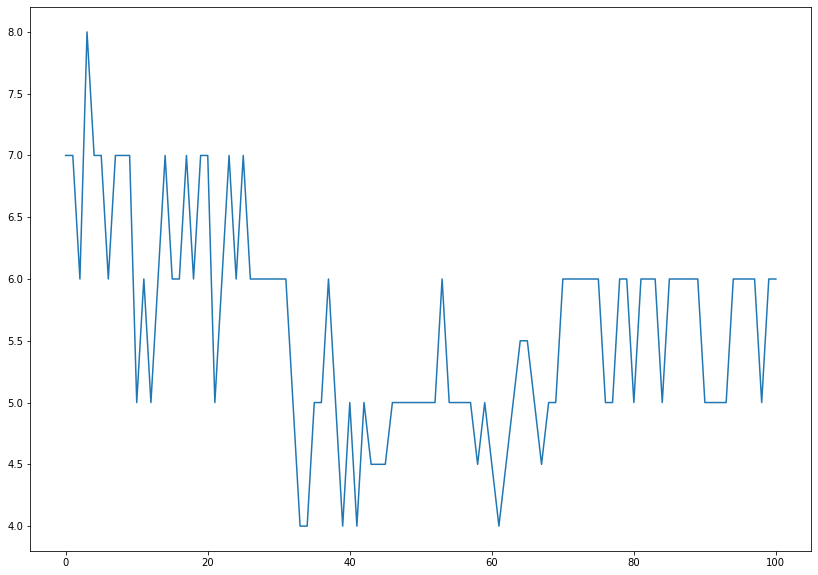

In [88]:
numbers = """7 7 6 8 7 7 
6 7 7 7 
5 6 5 6 7 
6 6 
7 6 7 7 
5 6 7 6 7 
6 6 6 6 6 6 5 4
4 5 5 6 5 4 5 4 
5 4.5 4.5 4.5 5 
5 5 5 5 
5 5 6 5 5 
5 5 4.5 5 4.5 4 4.5
5 5.5 5.5 5 4.5 5 
5 6 6 6 6 6 6 5
5 6 6 5 6 
6 6 5 6 
6 6 6 6 
5 5 5 
5 6 6 6 6
5 6 6"""

# print(7 not == 8)
full_arr = []
for day in numbers.split("\n"):
  arr = day.split(" ")
  arr = [float(val) for val in arr if val != '']
  full_arr += arr
# full_arr = np.stack(full_arr)
print(full_arr)
plt.plot(full_arr)
plt.show()

In [7]:
import os

all_people = os.listdir("emojis/people/microsoft")
all_faces = [name for name in all_people if "face" in name]
print(all_faces)

['face-savouring-delicious-food_1f60b.png', 'face-palm_1f926.png', 'smirking-face_1f60f.png', 'face-with-monocle_1f9d0.png', 'confounded-face_1f616.png', 'neutral-face_1f610.png', 'face-with-pleading-eyes_1f97a.png', 'yawning-face_1f971.png', 'woman-facepalming_1f926-200d-2640-fe0f.png', 'man-getting-face-massage_1f486-200d-2642-fe0f.png', 'grimacing-face_1f62c.png', 'white-frowning-face_2639.png', 'face-with-finger-covering-closed-lips_1f92b.png', 'face-with-medical-mask_1f637.png', 'shocked-face-with-exploding-head_1f92f.png', 'face-screaming-in-fear_1f631.png', 'grinning-cat-face-with-smiling-eyes_1f638.png', 'face-with-party-horn-and-party-hat_1f973.png', 'nerd-face_1f913.png', 'smiling-face-with-open-mouth-and-cold-sweat_1f605.png', 'zipper-mouth-face_1f910.png', 'smiling-cat-face-with-heart-shaped-eyes_1f63b.png', 'face-throwing-a-kiss_1f618.png', 'angry-face_1f620.png', 'smiling-face-with-smiling-eyes-and-three-hearts_1f970.png', 'smiling-face-with-halo_1f607.png', 'face-with-op

In [28]:
# categories ordered by amount:
fonts = ['joypixels', 'google', 'apple', 'whatsapp', 'openmoji', 'twitter',
 'samsung', 'microsoft', 'facebook', 'emojidex', 'lg', 'htc', 'mozilla',
 'docomo', 'softbank', 'au-kddi', 'emojipedia']

list_of_emojis = ["grinning-face_1f600", "grinning-face-with-big-eyes_1f603", "grinning-face-with-smiling-eyes_1f604",
                  "grinning-face-with-sweat_1f605", "grinning-squinting-face_1f606"]
extra = ["frowning-face-with-open-mouth_1f626", "hushed-face_1f62f"]
# broken: "frowning-face_2639-fe0f", 

category = "people"
train_fonts = ['joypixels', 'google', 'apple', 'whatsapp', 'twitter']
val_fonts = ['openmoji', 'samsung']

train_targets = []
for font in train_fonts:
  for emoji in list_of_emojis:
    train_targets.append("emoji/" + category + "/" + font + "/" + emoji)
print(len(train_targets))

val_targets = []
for font in train_fonts:
  for emoji in list_of_emojis + extra:
    val_targets.append("emoji/" + category + "/" + font + "/" + emoji)
print(len(val_targets))

25
35


In [31]:
("2", ) * 2

('2', '2')

25


Training: joypixels grinning-face_1f600
(120, 120, 4)


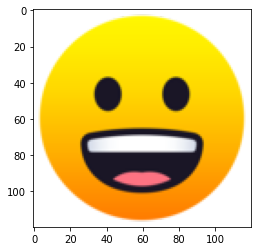

Training: joypixels grinning-face-with-big-eyes_1f603
(120, 120, 4)


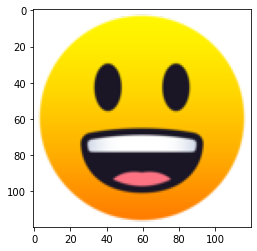

Training: joypixels grinning-face-with-smiling-eyes_1f604
(120, 120, 4)


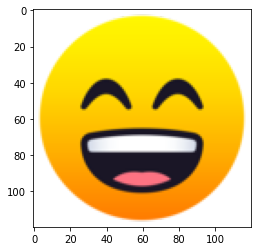

Training: joypixels grinning-face-with-sweat_1f605
(120, 120, 4)


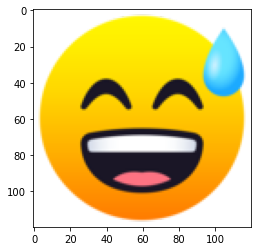

Training: joypixels grinning-squinting-face_1f606
(120, 120, 4)


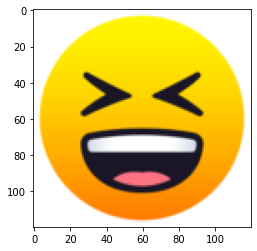

Extra: joypixels frowning-face-with-open-mouth_1f626
(120, 120, 4)


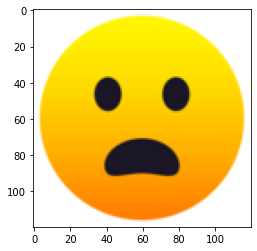

Extra: joypixels frowning-face_2639-fe0f
(120, 120, 4)


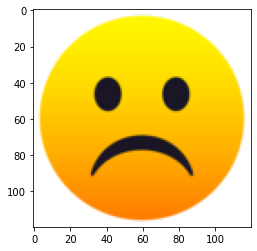

Extra: joypixels hushed-face_1f62f
(120, 120, 4)


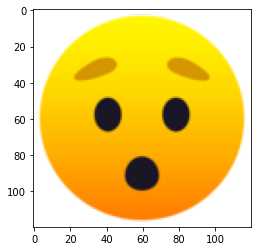

Training: google grinning-face_1f600
(120, 120, 4)


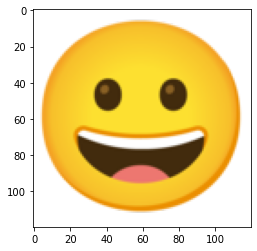

Training: google grinning-face-with-big-eyes_1f603
(120, 120, 4)


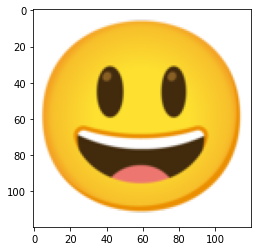

Training: google grinning-face-with-smiling-eyes_1f604
(120, 120, 4)


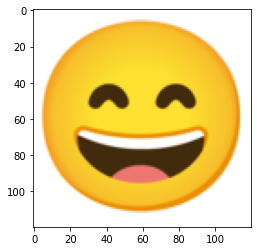

Training: google grinning-face-with-sweat_1f605
(120, 120, 4)


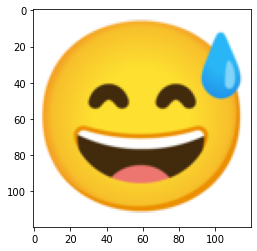

Training: google grinning-squinting-face_1f606
(120, 120, 4)


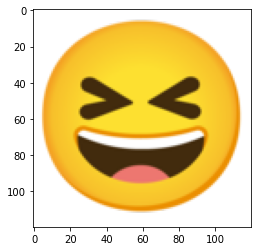

Extra: google frowning-face-with-open-mouth_1f626
(120, 120, 4)


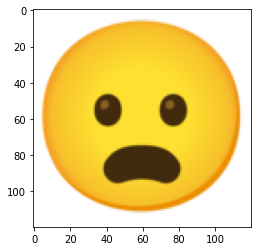

Extra: google frowning-face_2639-fe0f
(120, 120, 4)


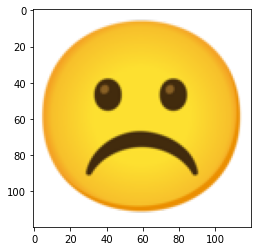

Extra: google hushed-face_1f62f
(120, 120, 4)


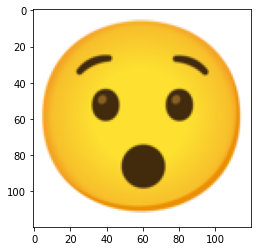

Training: apple grinning-face_1f600
(120, 120, 4)


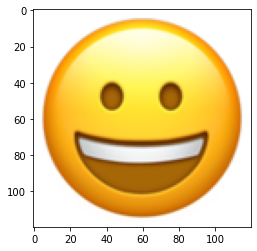

Training: apple grinning-face-with-big-eyes_1f603
(120, 120, 4)


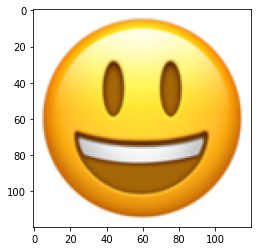

Training: apple grinning-face-with-smiling-eyes_1f604
(120, 120, 4)


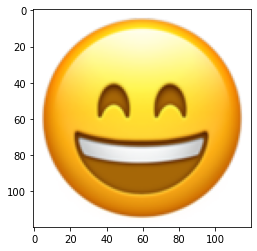

Training: apple grinning-face-with-sweat_1f605
(120, 120, 4)


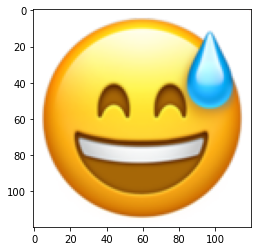

Training: apple grinning-squinting-face_1f606
(120, 120, 4)


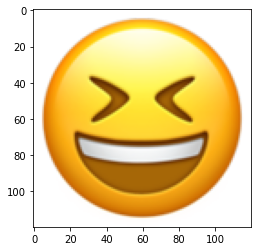

Extra: apple frowning-face-with-open-mouth_1f626
(120, 120, 4)


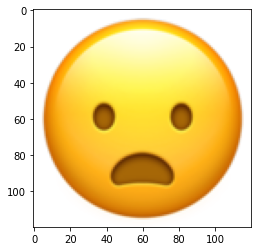

Extra: apple frowning-face_2639-fe0f
(120, 120, 4)


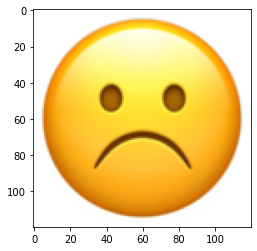

Extra: apple hushed-face_1f62f
(120, 120, 4)


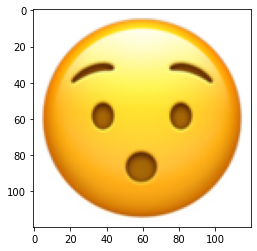

Training: whatsapp grinning-face_1f600
(120, 120, 4)


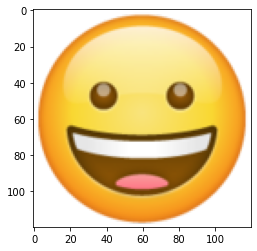

Training: whatsapp grinning-face-with-big-eyes_1f603
(120, 120, 4)


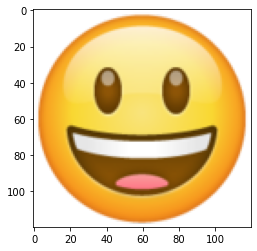

Training: whatsapp grinning-face-with-smiling-eyes_1f604
(120, 120, 4)


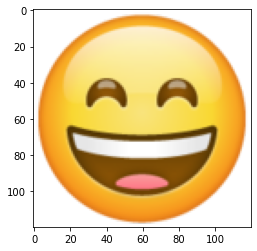

Training: whatsapp grinning-face-with-sweat_1f605
(120, 120, 4)


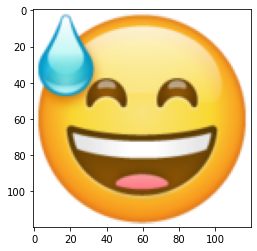

Training: whatsapp grinning-squinting-face_1f606
(120, 120, 4)


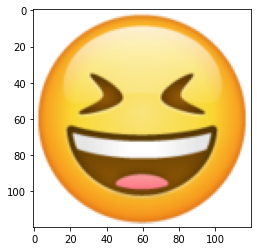

Extra: whatsapp frowning-face-with-open-mouth_1f626
(120, 120, 4)


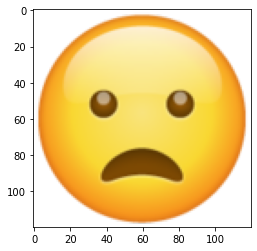

Extra: whatsapp frowning-face_2639-fe0f
(120, 120, 4)


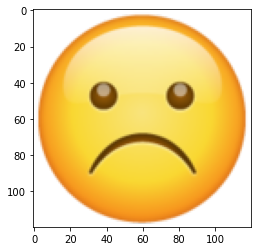

Extra: whatsapp hushed-face_1f62f
(120, 120, 4)


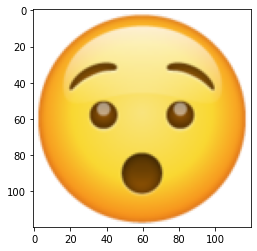

Training: openmoji grinning-face_1f600
(120, 120, 4)


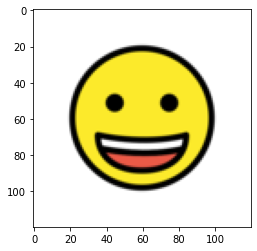

Training: openmoji grinning-face-with-big-eyes_1f603
(120, 120, 4)


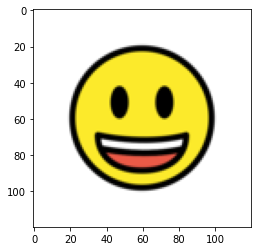

Training: openmoji grinning-face-with-smiling-eyes_1f604
(120, 120, 4)


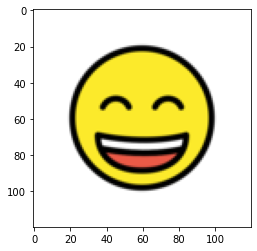

Training: openmoji grinning-face-with-sweat_1f605
(120, 120, 4)


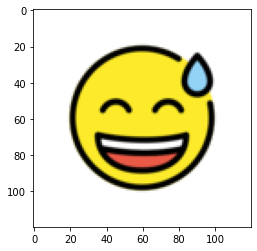

Training: openmoji grinning-squinting-face_1f606
(120, 120, 4)


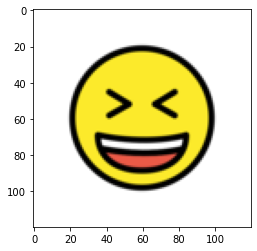

Extra: openmoji frowning-face-with-open-mouth_1f626
(120, 120, 4)


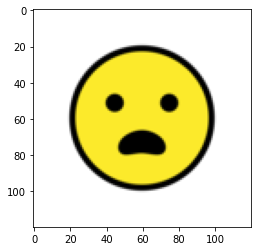

Extra: openmoji frowning-face_2639-fe0f
(120, 120, 4)


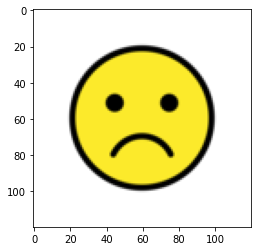

Extra: openmoji hushed-face_1f62f
(120, 120, 4)


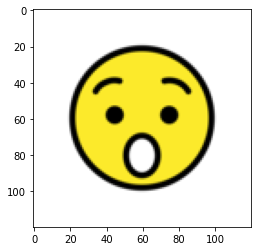

Training: twitter grinning-face_1f600
(120, 120, 4)


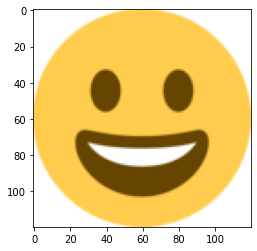

Training: twitter grinning-face-with-big-eyes_1f603
(120, 120, 4)


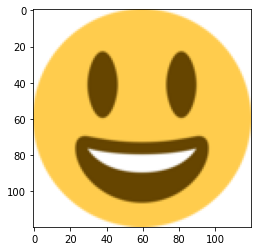

Training: twitter grinning-face-with-smiling-eyes_1f604
(120, 120, 4)


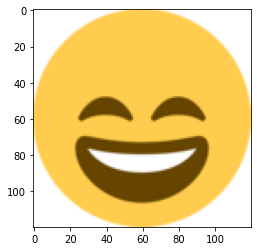

Training: twitter grinning-face-with-sweat_1f605
(120, 120, 4)


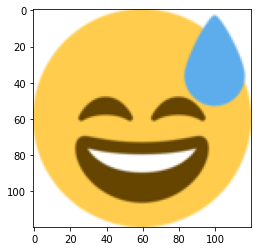

Training: twitter grinning-squinting-face_1f606
(120, 120, 4)


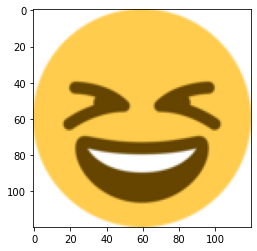

Extra: twitter frowning-face-with-open-mouth_1f626
(120, 120, 4)


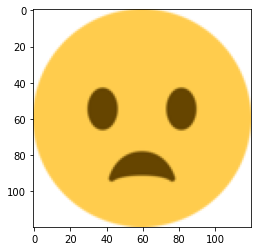

Extra: twitter frowning-face_2639-fe0f
(120, 120, 4)


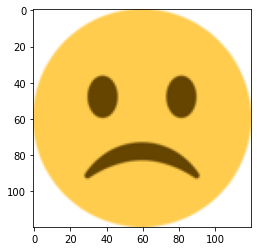

Extra: twitter hushed-face_1f62f
(120, 120, 4)


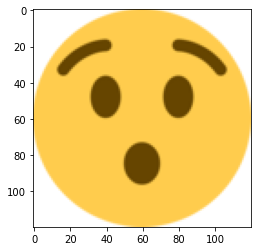

Training: samsung grinning-face_1f600
(108, 108, 4)


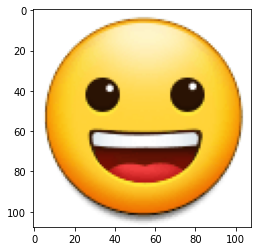

Training: samsung grinning-face-with-big-eyes_1f603
(108, 108, 4)


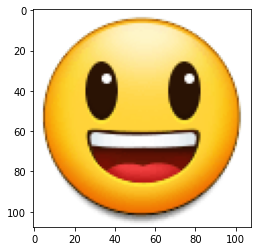

Training: samsung grinning-face-with-smiling-eyes_1f604
(108, 108, 4)


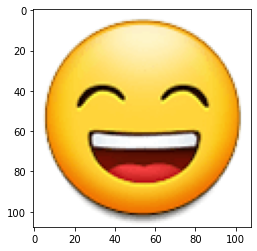

Training: samsung grinning-face-with-sweat_1f605
(108, 108, 4)


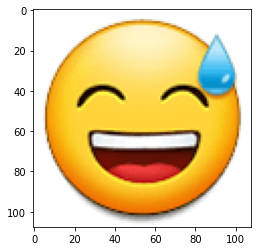

Training: samsung grinning-squinting-face_1f606
(108, 108, 4)


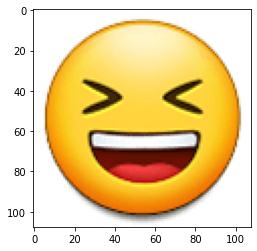

Extra: samsung frowning-face-with-open-mouth_1f626
(108, 108, 4)


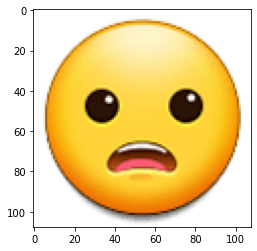

Extra: samsung frowning-face_2639-fe0f
(108, 108, 4)


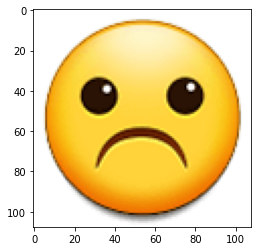

Extra: samsung hushed-face_1f62f
(108, 108, 4)


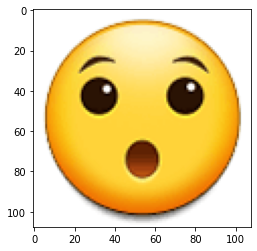

In [12]:
for font in fonts[:7]:
  for emoji in list_of_emojies + extra:
    if emoji in list_of_emojies:
      print("Training: ", end="")
    else: 
      print("Extra: ", end="")
    print(font, emoji)
    try:
      show_img_by_path("emojis/people/" + font + "/" + emoji + ".png")
    except FileNotFoundError as e:
      if emoji == "frowning-face_2639-fe0f":
        try:
          emoji = "frowning-face_2639"
          show_img_by_path("emojis/people/" + font + "/" + emoji + ".png")
        except FileNotFoundError as e:  
          print("File not found :", e)

In [33]:
x = np.array([[15,2],[3,4],[1,7], [8,4]])
x[x[:,0].argsort()]
# print(x.index(3))
# x.remove(3)
# print(x.index(4))

array([[ 1,  7],
       [ 3,  4],
       [ 8,  4],
       [15,  2]])

In [32]:
import requests
# import urllib.requests
import time
import PIL
import io
import matplotlib.pyplot as plt
import PIL.ImageOps
from bs4 import BeautifulSoup
import numpy as np
import os
import time

import requests
from bs4 import BeautifulSoup

      
def load_and_save_image(url, path, name):
  r = requests.get(url)
  img = PIL.Image.open(io.BytesIO(r.content)).convert('RGBA')
  
  if not os.path.exists(path):
    os.makedirs(path)
  img.save(path + name, "PNG")
  
def get_list_of_emojis(emoji_names, category):
  for name in emoji_names:
    data = requests.get(f'https://emojipedia.org/{name}')
    soup = BeautifulSoup(data.text, "html.parser")

    section = soup.findAll("section", {"class": "vendor-list"})
    count = 0
    for img_html in section[0].findAll("img"):
      
      if "https" in img_html["src"]:
        split_str = img_html["src"].split("/")
        font = split_str[5]
        file_name = split_str[7]
        path = "emojis/" + category + "/" + font + "/"
        img_arr = load_and_save_image(img_html["src"], path, file_name)     
        time.sleep(0.1)
    
# Done until not inclusive objects (16.02)
    
categories = ["people", "nature", "food-drink", "activity", "travel-places", "objects", "symbols", "flags"]
for category in categories:
  time.sleep(5)
  data = requests.get(f"https://emojipedia.org/{category}/")
  soup = BeautifulSoup(data.text, "html.parser")

  content_list = soup.findAll("div", {"class": "content"})
  links = content_list[0].findAll("a")
  emoji_names = []
  for link in links:
      emoji_names.append(link["href"][1:])
  print(len(emoji_names))
  get_list_of_emojis(emoji_names, category)
  

  # img = np.array(img)
  # img = img.astype("float64")/255.0


    

464
203
123
113
133
233


KeyboardInterrupt: 

In [48]:
import requests
from lxml import html

data = requests.get('https://emojipedia.org/grinning-face/')
# html_search_string = '<section class="vendor-list">'
tree = html.fromstring(data.content)
buyers = tree.xpath('//section[@class="vendor-list"]')
print(buyers[0].getchildren())
print(type(buyers[0]))
# buyers[0].items()
print(help(buyers[0]))

[<Element ul at 0x7f5713055720>]
<class 'lxml.html.HtmlElement'>
Help on HtmlElement in module lxml.html object:

class HtmlElement(lxml.etree.ElementBase, HtmlMixin)
 |  ElementBase(*children, attrib=None, nsmap=None, **_extra)
 |  
 |  The public Element class.  All custom Element classes must inherit
 |  from this one.  To create an Element, use the `Element()` factory.
 |  
 |  BIG FAT WARNING: Subclasses *must not* override __init__ or
 |  __new__ as it is absolutely undefined when these objects will be
 |  created or destroyed.  All persistent state of Elements must be
 |  stored in the underlying XML.  If you really need to initialize
 |  the object after creation, you can implement an ``_init(self)``
 |  method that will be called directly after object creation.
 |  
 |  Subclasses of this class can be instantiated to create a new
 |  Element.  By default, the tag name will be the class name and the
 |  namespace will be empty.  You can modify this with the following
 |  class 

In [29]:
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
import requests
import re
import io
import numpy as np
  
class EmojiConverter:
    def __init__(self):
        
        self.data = requests.get('https://unicode.org/emoji/charts/full-emoji-list.html').text
    def to_base64_png(self, emoji, version=2):
        """For different versions, you can set version = 0 for , """
        html_search_string = r"<img alt='{}' class='imga' src='data:image/png;base64,([^']+)'>" #'
        matchlist = re.findall(html_search_string.format(emoji), self.data)
        return matchlist[version]

e = EmojiConverter()


import base64

for i in range(6):
  b64 = e.to_base64_png("😀", version=i)
  imgdata = base64.b64decode(b64)
  image = Image.open(io.BytesIO(imgdata), "RGB")
  # image = Image.frombytes('RGB', (72, 72), imgdata, 'raw')
  im_arr = np.asarray(image, dtype="uint8")
  # im_arr = im_arr / np.amax(im_arr) 
  print(np.amax(im_arr), np.amin(im_arr))
  plt.imshow(im_arr)
  plt.show()
# b64 = e.to_base64_png("👨"+"\u200D" + "🔧")


# plt.imshow(imgdata)
#plt.show()

ValueError: bad mode 'RGB'

255
(30, 30, 4)
[1. 1. 1. 0.]
[0. 0. 0. 0.]


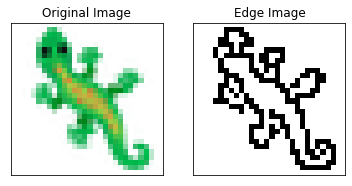

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import config as cfg
import datasets

img1 = cv2.imread('messi5.jpg',0)

print(np.amax(img1))

orig_img = datasets.Emoji("lizard").emoji_img
img = np.copy(orig_img)
img[:,:,:3] *= img[:,:,3:4]
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = np.uint8(255 * img)
# print(np.amax(img))
edges = cv2.Canny(img,100,200)[:,:,None]
edges = np.repeat(edges, 4, axis=2)
edges = edges.astype(np.float32) / 255.
edges[:,:,:3] = 1.0 - edges[:,:,:3]
# edges[:,:,3] = 1 - edges[:,:,3]
# edges = 1.0 - edges[:,:,3:4] + edges[:,:,:3]
# print(np.shape(edges), np.shape(orig_img[:,:,3:4]))
# edges = np.stack([edges[:,:,0], edges[:,:,1], edges[:,:,2], orig_img[:,:,3]], axis=2)
print(np.shape(edges))
# assert False

print(edges[0][0])
print(orig_img[0][0])
plt.subplot(121),plt.imshow(orig_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [33]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

data = {"lizard": {
        "clean": np.linspace(0,50,50),
        "damaged": np.linspace(10,60,50)
},
       "heart": {
          "clean": np.linspace(0,40,50),
          "damaged": np.linspace(10,40,50)
       }}
# df = px.data.iris()
fig = go.Figure()
# print(data.keys())

for emoji_name, emoji_dict in data.items():
  for key, value in emoji_dict.items():
    fig.add_trace(go.Scatter(y=value,mode="lines",name=f"{emoji_name}_{key}"))
# fig.add
# fig = px.line(df, x=df.index, y="sepal_length", color="species")
fig.show()

# print(df.index[12])
# print(type(df))
# print(df)
# print(df["sepal_width"])

In [44]:
dict1 = {"a":[5], "b":[7]}
# dict2 = {"a":[2,7,8], "b":[8,7,6]}
dict2 = {}

for key, val in dict1.items():
  dict2[key] += val
# print(sum(dict1.values()))
# dict1.values = sum(dict1.values() + dict2.value()
print(dict2)

KeyError: 'a'

In [25]:
print(df.species)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [18]:
x = 1./3.
y = 1./3.
z = 1./3.
z = z + 70000
z = z - 70000
print(x + y + z)

0.9999999999951493


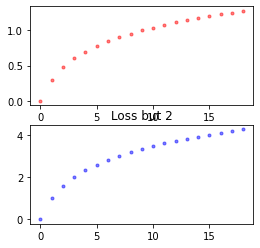

In [1]:
# %matplotlib inline
import time
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

x = []

def plot_loss_1(loss_log):
  plt.figure(figsize=(4, 4))
  plt.title('Loss history (log10)')
  plt.subplot(2,1,1)
  plt.plot(np.log10(loss_log), '.', alpha=0.5, color="r")

def plot_loss_2(loss_log):
  plt.subplot(2,1,2)
  plt.title("Loss but 2")
  plt.plot(np.log2(loss_log), '.', alpha=0.5, color="b")  
  
for i in range(1, 20):
  x.append(i)
  display.clear_output(wait=True)
  plot_loss_1(x)
  plot_loss_2(x)
  plt.show()
  # display.display(plt.gcf())
  
  # plt.clf()
  # time.sleep(0.1)

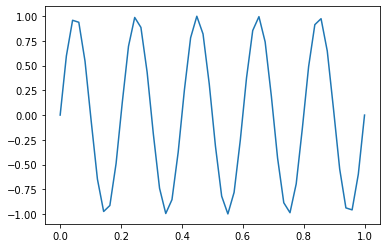

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def sine_wave(f,t,sample):
  w = 2*np.pi*f
  time = np.linspace(0,t,sample)
  y = np.sin(2*np.pi*f*time)
  return time, y

# print(sine_wave(5,1,50))
plt.plot(*sine_wave(5,1,50))
plt.show()

1.0


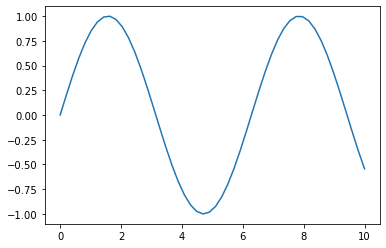

In [15]:
print(np.sin(1/2 * np.pi))

plt.plot(np.linspace(0,10,50), np.sin(np.linspace(0,10,50)))
plt.show()

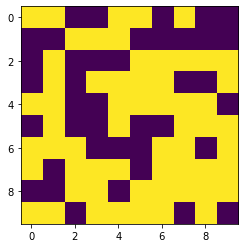

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

ds = np.ones((10,10))
stat = np.ones((10,10)) * 2


alpha = x[:, :, :, 3:4]
update = tf.nn.max_pool2d(alpha, 3, [1, 1, 1, 1], 'SAME') > 0.1

res = tf.where(update, stat, ds)
# res
plt.imshow(res)
plt.show()

# stat[update] = ds[update]
# stat
# stat2 = np.copy(stat)
# print(ds.shape, stat.shape, stat2.shape, update.shape)
# np.shape(stat2[update])
# stat2.putmask(update, ds)
# stat2
# stat2
# stat2

In [15]:
import tensorflow as tf
import numpy as np

batch_size = 8

def get_model():
  val = np.ones((batch_size, 10), dtype=np.float32) * 0.5
  w = tf.Variable(val, shape=(batch_size, 10), dtype=np.float32)

  l_in = tf.keras.Input(shape=(10))
  l1 = tf.keras.layers.Dense(20)(l_in)
  l2 = tf.keras.layers.Dense(10)(l1)

  # skip_1 = t
  l_out = tf.keras.layers.Add()([w * l_in, (1-w) * l2])

  model = tf.keras.Model(inputs=l_in, outputs=l_out)
  return model


x = tf.constant(1.0, shape=(batch_size, 10))
# model = get_model()
print(model.summary())
model.get_layer("add_1").output
# res = model(x)
# print(res)


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           220         input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 10)           210         dense_2[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_Mul (TensorFlowOpLa [(8, 10)]            0           input_2[0][0]                    
_______________________________________________________________________________________

<tf.Tensor 'add_1/add:0' shape=(8, 10) dtype=float32>

In [12]:
import tensorflow as tf
import numpy as np

x = np.array([[[[1], [1], [1]],
              [[1], [1], [1]],
              [[1], [1], [1]]]], dtype=np.float32)
print(x.shape)
filters = np.ones((3,3,1,3),dtype=np.float32)
strides = 1
padding = "VALID"

z = tf.nn.conv2d(x, filters, strides, padding )
print(z)

(1, 3, 3, 1)
tf.Tensor([[[[9. 9. 9.]]]], shape=(1, 1, 1, 3), dtype=float32)


In [5]:
import os

cur_path = "logs/niaeria".split("/")
print(cur_path[0])
os.path.isdir(cur_path[0])

logs


True

In [16]:
import datasets 
import importlib

x, y, _, _ = datasets.get_emoji_data()
plt.imshow(y[0])
plt.show()

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [62]:
import plotly.express as px
import numpy as np


y = np.random.normal(5, 2, size=100)
data = {"y":y}

y_mean = []
x_mean = []
for i in range(0,len(y),10):
  x_mean.append(i+5)
  y_mean.append(1/10*sum(y[i:i+10]))

data2 = {"y":y_mean, "x":x_mean, "mode":"lines"}
fig = px.scatter(data, y="y", opacity=0.5)
fig.layout.title = {"text": "Test?", "font":{"family":"Open Sans", "size":24}, "x":0.5, "xanchor":"center"}
# fig.layout.align = "center"
fig2_data = px.scatter(data2, y="y", x="x").data[0]
fig2_data.mode = "lines"
fig2_data.marker.color="red"
fig.add_trace(fig2_data)
# print(fig.layout)
fig.show()


In [15]:
import plotly.express as px
import plotly.graph_objects as go

# df = px.data.iris()

In [30]:
for i in range(10):
  print("\r LAET: ", i, end="")
  print("")

 LAET:  0
 LAET:  1
 LAET:  2
 LAET:  3
 LAET:  4
 LAET:  5
 LAET:  6
 LAET:  7
 LAET:  8
 LAET:  9


In [33]:
import numpy as np

fig = go.Figure()

val = np.arange(0,20)
fig2= go.Scatter(name="a", y=val, opacity=0.5)
fig = go.Figure(fig2)
fig.update_yaxes(type="log")
# fig.add_trace(go.Scatter(name="a", y=val))
# fig.add_trace(go.Scatter(name="b", y=val+1))
# fig.add_trace(go.Scatter(name="c", y=val+2))
fig.show()
# print(fig)

In [44]:
import plotly.graph_objects as go


y_mean = []
x_mean = []
for i in range(0,len(y),10):
  x_mean.append(i+5)
  y_mean.append(1/10*sum(y[i:i+10]))

print(y_mean)
fig_dict = dict({
  "data": [{"type":"scatter", "y":y, "mode":"markers"},
           {"type":"scatter", "y":y_mean, "x":x_mean, "mode":"lines"}],
  "layout":{"title":{"text":"THis is the Title"}}
})
fig = go.Figure(fig_dict)
fig.show()

[5.988267809393597, 4.665622682888336, 3.333211358306292, 5.082265885429677, 5.530746078166956, 5.185826077102465, 4.5687335987203355, 6.290158349371714, 4.126951788198161, 5.252992045758077]


In [29]:
# Class test

x = {"p":5}

class T:
  def __init__(self, a):
    self.set_par(a)
    
  def set_par(self, a):
    for key in a.keys():
      assert hasattr(self, key), f"{self} does not have attr {key}"
      setattr(self, key, a[key])

class B(T):
  p = 3
  af = p * 5
  
  def __init__(self, b):
    super().__init__(b)
    

val = B(x)
val.p

# print("p:",T(x).p)

5

In [1]:
from visdom import Visdom
vis = Visdom()

Setting up a new session...


In [49]:
# vis.text("Telst")
import numpy as np

a = np.array([1,2,7,8,65])
b = np.array([12,5,6,3,4])

z = np.stack((a,b), 1)
# print(np.array([x[0], b]).shape)
print(z.shape)
vis.line(z, opts={'markers':True, 'markersize':5, 'title':'Plot stuff here'})

ValueError: all input arrays must have the same shape

In [50]:
vis.text(str({'markers':True, 'markersize':5, 'title':'Plot stuff here'}))

'window_38fb4fd25b733e'

In [29]:
total_time_dict = {}

if not hasattr(total_time_dict, "test"):
    total_time_dict["test"] = []

In [32]:
total_time_dict["test"] = 5

print(total_time_dict.keys())

if not hasattr(total_time_dict, "test"):
    total_time_dict["test"] = []
    
print(total_time_dict)

dict_keys(['test'])
{'test': []}


In [23]:
@timeit
def test(x):
  print("Executing")
  time.sleep(x)
  print("eof func")

test(1)

Executing
eof func
total execution time of test  1.0013847351074219


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
import numpy as np

class MyModel
perceive = tf.keras.Sequential([
            Conv2D(80, 3, activation=tf.nn.relu, padding="SAME")])

perceive(tf.zeros([1, 3, 3, 50]))
perceive.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            multiple                  36080     
Total params: 36,080
Trainable params: 36,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
import tensorflow as tf

class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)

  def call(self, inputs):
    x = self.dense1(inputs)
    return self.dense2(x)

model = MyModel()
model.build(input_shape=(10,10))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  44        
_________________________________________________________________
dense_1 (Dense)              multiple                  25        
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [4]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
get_available_gpus()

['/device:GPU:0']

In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [11]:
from tensorflow.keras.layers import Conv2D
CHANNEL_N = 16
CELL_FIRE_RATE = 0.5
ADD_NOISE = False

class CAModel(tf.keras.Model):

  def __init__(self, channel_n=CHANNEL_N, fire_rate=CELL_FIRE_RATE,
               add_noise=ADD_NOISE):
    # CHANNEL_N does *not* include the greyscale channel.
    # but it does include the 10 possible outputs.
    super().__init__()
    self.channel_n = channel_n
    self.fire_rate = fire_rate
    self.add_noise = add_noise

    self.perceive = tf.keras.Sequential([
          Conv2D(80, 3, activation=tf.nn.relu, padding="SAME"),
      ])

    self.dmodel = tf.keras.Sequential([
          Conv2D(80, 1, activation=tf.nn.relu),
          Conv2D(self.channel_n, 1, activation=None,
                       kernel_initializer=tf.zeros_initializer),
    ])

    self(tf.zeros([1, 3, 3, channel_n + 1]))  # dummy calls to build the model

  @tf.function
  def call(self, x, fire_rate=None, manual_noise=None):
    gray, state = tf.split(x, [1, self.channel_n], -1)
    ds = self.dmodel(self.perceive(x))
    if self.add_noise:
      if manual_noise is None:
        residual_noise = tf.random.normal(tf.shape(ds), 0., 0.02)
      else:
        residual_noise = manual_noise
      ds += residual_noise

    if fire_rate is None:
      fire_rate = self.fire_rate
    update_mask = tf.random.uniform(tf.shape(x[:, :, :, :1])) <= fire_rate
    living_mask = gray > 0.1
    residual_mask = update_mask & living_mask
    ds *= tf.cast(residual_mask, tf.float32)
    state += ds
    
    return tf.concat([gray, state], -1)

  @tf.function
  def initialize(self, images):
    state = tf.zeros([tf.shape(images)[0], 28, 28, self.channel_n])
    images = tf.reshape(images, [-1, 28, 28, 1])
    return tf.concat([images, state], -1)

  @tf.function
  def classify(self, x):
    # The last 10 layers are the classification predictions, one channel
    # per class. Keep in mind there is no "background" class,
    # and that any loss doesn't propagate to "dead" pixels.
    return x[:,:,:,-10:]

CAModel().perceive.summary()
CAModel().dmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            multiple                  12320     
Total params: 12,320
Trainable params: 12,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            multiple                  6480      
_________________________________________________________________
conv2d_7 (Conv2D)            multiple                  1296      
Total params: 7,776
Trainable params: 7,776
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

# set y/x data via this?
def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);

In [ ]:
interact(update);

In [ ]:
x = 'test' #@param ['test', 'test2']

In [ ]:
y = 7

In [ ]:
y